In [1]:
import pandas as pd
import numpy as np
from factor_backtest import preprocess
from factor_backtest import group_calc
from factor_backtest import factor_analysis
from factor_backtest import utils
import polars as pl

In [2]:
# index = pd.read_csv('../data/index_stocks/index_ZZ500_stocks.csv', index_col=0)
# index['trade_date'].unique(),len(index['trade_date'].unique())

# 载入数据

In [5]:
# 读取数据
factor_df=pl.read_csv('../data/new_monthly_synergy_diff_factors.csv').to_pandas()
bp_df = pd.read_csv('../data/pb.csv')
ret_df=pd.read_csv('../data/ret_df.csv')
mktmv_df = pd.read_csv('../data/ltsz.csv')
benchmark = pd.read_csv('../data/index_ret.csv')
ind_df=pd.read_csv('../data/ind_df.csv')
# 处理股票代码
codefunc1=lambda x: '{:0>6}'.format(x)
# factor_df['stock_code']=factor_df['code'].apply(codefunc1)
bp_df['stock_code']=bp_df['stock_code'].apply(codefunc1)
ret_df['stock_code']=ret_df['stock_code'].apply(codefunc1)
# mktmv_df['stock_code']=mktmv_df['stock_code'].apply(codefunc1)
ind_df['stock_code']=ind_df['stock_code'].apply(codefunc1)
# 处理日期
codefunc2 = lambda x: x if pd.isna(x) else str(int(x))

# factor_df['trade_date'] = pd.to_datetime(factor_df['date'], format='%Y-%m-%d')
## 转为‘%Y%m%d’
# factor_df['trade_date'] = factor_df['trade_date'].dt.strftime('%Y%m%d')
# factor_df['trade_date']=factor_df['trade_date'].apply(codefunc2)
## ret_df['trade_date']转为 日期格式 
ret_df['trade_date'] = pd.to_datetime(ret_df['trade_date'], format='%Y-%m-%d')
## 转为‘%Y%m%d’
ret_df['trade_date'] = ret_df['trade_date'].dt.strftime('%Y%m%d')
ret_df['trade_date']=ret_df['trade_date'].apply(codefunc2)
mktmv_df['trade_date']=mktmv_df['trade_date'].apply(codefunc2)


bp_df['trade_date']=bp_df['trade_date'].apply(codefunc2)

ind_df['trade_date'] = pd.to_datetime(ind_df['trade_date'], format='%Y-%m-%d')
## 转为‘%Y%m%d’
ind_df['trade_date'] = ind_df['trade_date'].dt.strftime('%Y%m%d')
ind_df['trade_date']=ind_df['trade_date'].apply(codefunc2)
benchmark['trade_date'] = benchmark['trade_date'].apply(codefunc2)
# ind_df

# 预处理

In [6]:
factor_df = factor_df.dropna()
## drop 0
# factor_df = factor_df[factor_df['factor']!=0]
factor_df = utils.get_previous_factor(factor_df)
factor_df

,trade_date,stock_code,monthly_mean,monthly_std,factor
0,2014-01-30,000001.SZ,-0.004850,0.012855,0.004003
1,2014-01-30,000002.SZ,-0.003328,0.017642,0.007157
2,2014-01-30,000004.SZ,-0.001228,0.021745,0.010259
3,2014-01-30,000005.SZ,-0.007424,0.012762,0.002669
4,2014-01-30,000006.SZ,-0.008022,0.019019,0.005499
...,...,...,...,...,...
8615893,2014-07-15,688799.SH,-0.000469,0.016621,0.008076
8615894,2014-07-15,688800.SH,-0.006055,0.015174,0.004560
8615895,2014-07-15,688819.SH,0.008971,0.013679,0.011325
8615896,2014-07-15,688981.SH,0.003218,0.018856,0.011037


In [15]:
factor_df['trade_date'] = pd.to_datetime(factor_df['trade_date'], format='%Y-%m-%d')
## 转为‘%Y%m%d’
factor_df['trade_date'] = factor_df['trade_date'].dt.strftime('%Y%m%d')
factor_df

,trade_date,stock_code,factor
0,20140130,000001.SZ,-0.004003
1,20140130,000002.SZ,-0.007157
2,20140130,000004.SZ,-0.010259
3,20140130,000005.SZ,-0.002669
4,20140130,000006.SZ,-0.005499
...,...,...,...
8615893,20140715,688799.SH,-0.008076
8615894,20140715,688800.SH,-0.004560
8615895,20140715,688819.SH,-0.011325
8615896,20140715,688981.SH,-0.011037


In [ ]:
# factor_df['factor'] = -factor_df['factor_1']#- factor_df['sum_放_阳大长上短下']

In [12]:
mktmv_df = mktmv_df.dropna()
mktmv_df = utils.get_previous_factor(mktmv_df)

# mktmv_df

In [ ]:
# bp_df = bp_df.dropna()
# bp_df

In [7]:
# 处理factor因子
# MAD去极值
factor_df = preprocess.select_stock(factor_df,index_name = None,drop_hk = True,drop_bj = True)
factor_df = factor_df[['trade_date', 'stock_code', 'factor']]
factor_df['factor'] = - factor_df['factor']
factor_df = preprocess.del_outlier(factor_df, 'factor', method='mad', n=3)
# # 排序标准化
# factor_df = preprocess.standardize(factor_df, 'factor', method='rank')
# # 同时做市值中性化和行业中性化
# factor_df=preprocess.neutralize(factor_df=factor_df,
#                                  factor_name='factor',
#                                  mktmv_df=mktmv_df,
#                                  industry_df=ind_df)

factor_df

,trade_date,stock_code,factor
0,2014-01-30,000001.SZ,-0.004003
1,2014-01-30,000002.SZ,-0.007157
2,2014-01-30,000004.SZ,-0.010259
3,2014-01-30,000005.SZ,-0.002669
4,2014-01-30,000006.SZ,-0.005499
...,...,...,...
8615893,2014-07-15,688799.SH,-0.008076
8615894,2014-07-15,688800.SH,-0.004560
8615895,2014-07-15,688819.SH,-0.011325
8615896,2014-07-15,688981.SH,-0.011037


# 分组收益率计算

In [16]:
mw_group_ret = group_calc.get_group_ret(factor_df, ret_df, 'factor', 10, None)
mw_group_ret

d:\onedrive - cuhk-shenzhen\量化研究\factor_backtest-main\base\src\factor_backtest\group_calc.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(["trade_date", group_name])


,Group0,Group1,Group2,Group3,Group4,Group5,Group6,Group7,Group8,Group9,H-L
20140207,0.030662,0.024539,0.020459,0.018689,0.014507,0.015455,0.015550,0.014430,0.012058,0.009016,-0.021646
20140210,0.024054,0.027652,0.032779,0.026792,0.030180,0.029699,0.030263,0.026793,0.028489,0.025426,0.001372
20140211,-0.005240,-0.000258,0.002253,0.003042,0.005652,0.006803,0.004822,0.008109,0.006478,0.006784,0.012024
20140212,0.007634,0.015552,0.016020,0.015886,0.016984,0.016381,0.016046,0.012665,0.011132,0.008927,0.001292
20140213,-0.031948,-0.022956,-0.017590,-0.016557,-0.012882,-0.011759,-0.011878,-0.010272,-0.010555,-0.010526,0.021421
...,...,...,...,...,...,...,...,...,...,...,...
20240130,-0.036763,-0.030491,-0.031351,-0.030216,-0.030758,-0.029401,-0.030841,-0.030999,-0.031788,-0.033447,0.003316
20240131,-0.044903,-0.039937,-0.038097,-0.041668,-0.043416,-0.046956,-0.048384,-0.054043,-0.057564,-0.058841,-0.013938
20240201,-0.012534,-0.013474,-0.013685,-0.014956,-0.016196,-0.017057,-0.015720,-0.015239,-0.015946,-0.014260,-0.001726
20240202,-0.031609,-0.030201,-0.032976,-0.037522,-0.041304,-0.046578,-0.049096,-0.051768,-0.054148,-0.057766,-0.026158


# 因子分析

In [17]:
mw_group_ret = mw_group_ret.dropna()

In [18]:
factor_analysis.newy_west_test(mw_group_ret['H-L'],'factor')

{'factor_name': ['factor'],
 'ret_mean(%)': [0.193],
 't-value': [8.521],
 'p-value': [0.0],
 'p-star': ['***']}

# IC检验

In [19]:
ic_dct, ic_fig = factor_analysis.analysis_factor_ic(factor_df, ret_df, 'factor')
pd.DataFrame(ic_dct)


,因子名称,IC均值,IC标准差,IR比率,IC>0的比例(%),IC>0.02的比例(%)
0,factor,0.022218,0.117155,0.189645,58.203445,51.066448


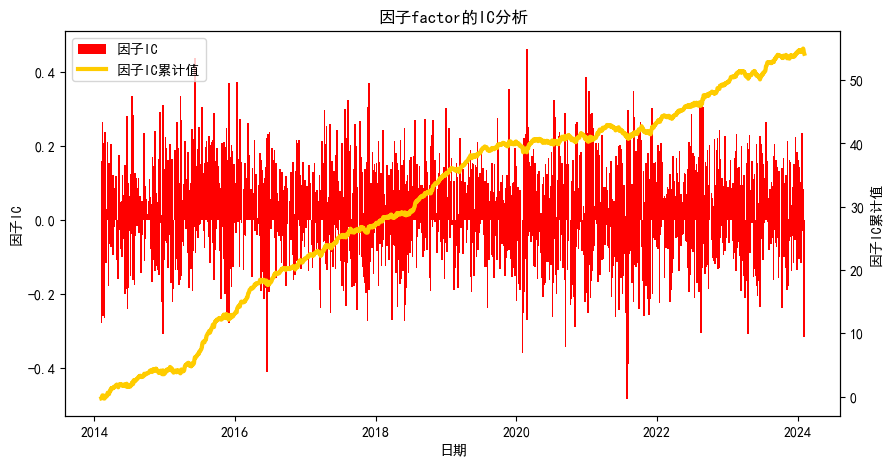

In [20]:
ic_fig

# RankIC 检验

In [21]:
rank_ic_dct, rank_ic_fig = factor_analysis.analysis_factor_rank_ic(factor_df, ret_df, 'factor')
pd.DataFrame(rank_ic_dct)

,因子名称,RankIC均值,RankIC标准差,RankIR比率,RankIC>0的比例(%),RankIC>0.02的比例(%)
0,factor,0.058497,0.117567,0.497567,70.016407,64.64315


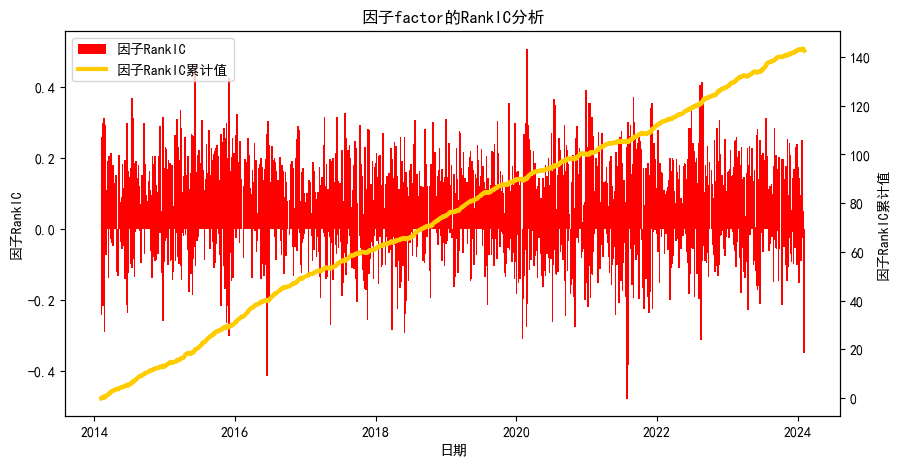

In [22]:
rank_ic_fig

# 净值曲线

In [23]:
ew_backtest_df,ew_fig1,ew_fig2=group_calc.analysis_group_ret(factor_df, ret_df, 'factor', n_groups=10, benchmark=None, mktmv_df=None)
ew_backtest_df

d:\onedrive - cuhk-shenzhen\量化研究\factor_backtest-main\base\src\factor_backtest\group_calc.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(["trade_date", group_name])


,Group0,Group1,Group2,Group3,Group4,Group5,Group6,Group7,Group8,Group9,H-L
年化收益率(%),-27.416642,-6.466507,1.465201,8.181865,12.022678,16.597567,18.457140,21.975294,22.335809,19.245106,60.312277
年化波动率(%),31.751168,29.458617,29.031407,28.621655,28.434015,28.312584,28.407919,28.228738,28.315087,28.298062,16.412399
夏普比率,-0.863485,-0.219512,0.050470,0.285863,0.422827,0.586226,0.649718,0.778472,0.788831,0.680086,3.674799
最大回撤(%),-98.116951,-82.658481,-73.017013,-63.933333,-58.059689,-51.768993,-51.369936,-48.279362,-49.775399,-46.577518,-17.868821


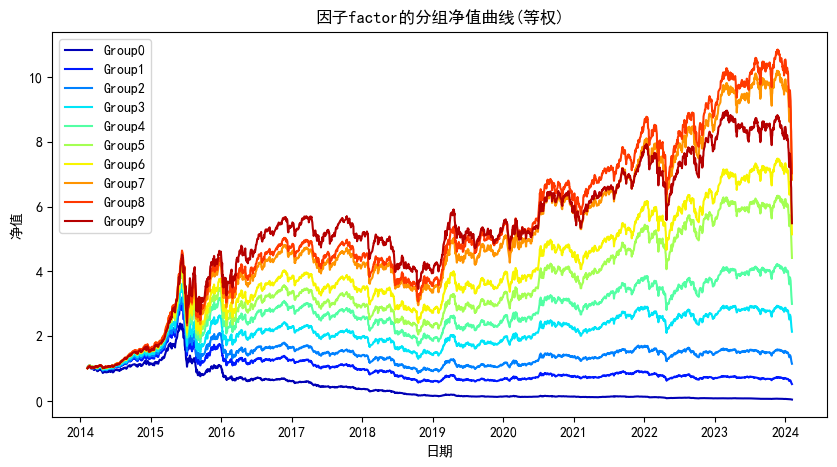

In [24]:
ew_fig1

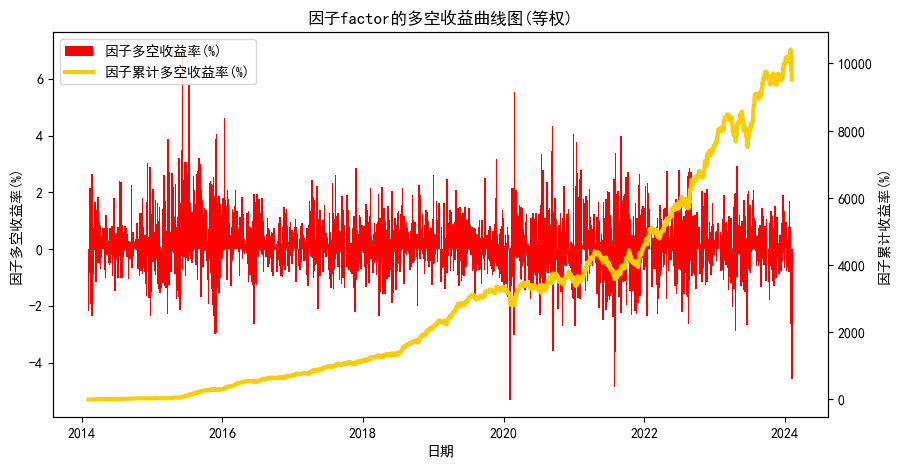

In [25]:
ew_fig2

In [26]:
mw_backtest_df,mw_fig1,mw_fig2=group_calc.analysis_group_ret(factor_df, ret_df, 'factor', n_groups=10, mktmv_df=mktmv_df)
mw_backtest_df

d:\onedrive - cuhk-shenzhen\量化研究\factor_backtest-main\base\src\factor_backtest\group_calc.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(["trade_date", group_name])


,Group0,Group1,Group2,Group3,Group4,Group5,Group6,Group7,Group8,Group9,H-L
年化收益率(%),-23.303656,-2.917580,2.342403,8.760422,8.210972,7.988706,10.803763,11.340746,14.425967,9.668853,37.597088
年化波动率(%),29.509351,26.608749,25.537761,24.102315,23.716679,23.842634,23.899269,23.818408,23.784831,24.854321,22.492084
夏普比率,-0.789704,-0.109647,0.091723,0.363468,0.346211,0.335060,0.452054,0.476134,0.606520,0.389021,1.671570
最大回撤(%),-96.732708,-80.524782,-69.938643,-54.218897,-50.687106,-42.577663,-45.716264,-42.821448,-32.467782,-35.958107,-32.049853


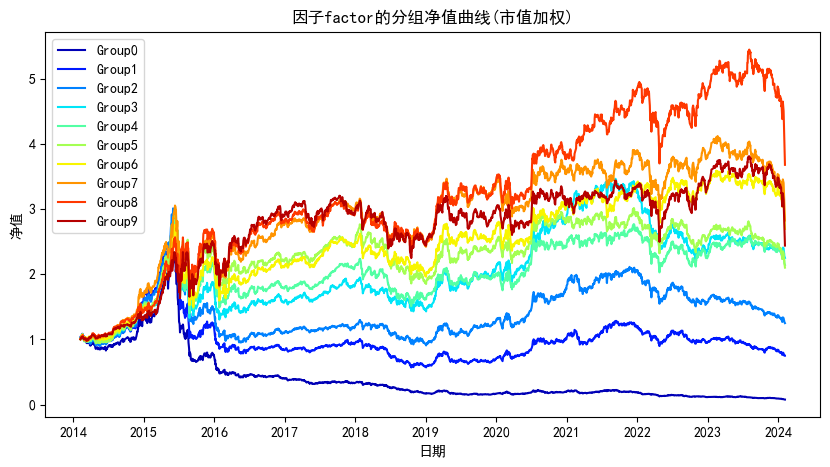

In [27]:
mw_fig1

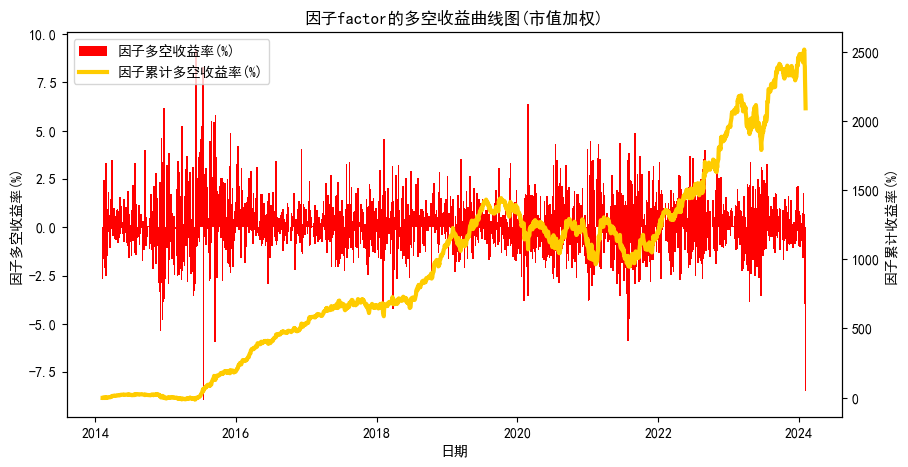

In [28]:
mw_fig2

# 序贯双重排序

In [29]:
db_sort_group_ret = group_calc.get_double_sort_group_ret(
    bp_df,
    factor_df,
    ret_df,
    "bp",
    "factor",
    5,
    5,
    mktmv_df=mktmv_df,
)
db_sort_group_ret

ValueError: The columns of df must be var_lst:trade_date, stock_code, bp

In [ ]:
db_sort_mean_df = group_calc.double_sort_mean(db_sort_group_ret,"bp","factor")
db_sort_mean_df

Group0  Group1  Group2  Group3  Group4    H-L
Group0 ret_mean(%)  -0.016   0.034   0.052   0.062   0.119  0.135
       t-value      -0.538   0.301   1.327   2.109   1.446  3.161
Group1 ret_mean(%)  -0.023   0.011   0.045   0.075   0.060  0.082
       t-value      -0.387   0.655   1.034   2.063   2.315  4.694
Group2 ret_mean(%)  -0.016   0.024   0.033   0.069   0.089  0.104
       t-value      -0.370   0.402   1.419   1.723   2.631  5.166
Group3 ret_mean(%)  -0.016   0.016   0.055   0.063   0.104  0.120
       t-value      -0.913   0.828   1.767   1.623   2.635  5.986
Group4 ret_mean(%)  -0.040   0.034   0.067   0.063   0.107  0.146
       t-value      -0.406   1.021   1.504   1.621   2.494  4.716

In [ ]:
db_sort_backtest_df = group_calc.double_sort_backtest(db_sort_group_ret, "bp", "factor", benchmark=None, period="DAILY")
db_sort_backtest_df

Group0     Group1     Group2     Group3     Group4  \
Group0 年化收益率(%)  -7.436262   5.512445  10.361937  12.803682  28.989756   
       年化波动率(%)  27.071767  24.762032  25.486265  26.767197  30.220327   
       夏普比率      -0.274687   0.222617   0.406569   0.478335   0.959280   
       最大回撤(%)  -78.391544 -52.160429 -42.243271 -57.900955 -56.252165   
Group1 年化收益率(%)  -9.298901  -0.601984   8.598528  16.892260  11.357437   
       年化波动率(%)  28.393189  25.751979  24.286369  25.831422  29.349082   
       夏普比率      -0.327505  -0.023376   0.354047   0.653942   0.386978   
       最大回撤(%)  -83.312118 -67.489785 -45.986533 -47.784046 -52.546035   
Group2 年化收益率(%)  -7.568670   2.722847   5.770138  15.522539  20.347373   
       年化波动率(%)  28.026229  25.492258  23.527802  23.983286  27.333020   
       夏普比率      -0.270057   0.106811   0.245248   0.647223   0.744425   
       最大回撤(%)  -82.147144 -58.063365 -55.361540 -41.922520 -42.561671   
Group3 年化收益率(%)  -8.073216   0.075626  10.755262  13.411939  25.109939   
       年化波动率(%)  29.598119  28.012199  26.611420  25.643610  27.321074   
       夏普比率      -0.272761   0.002700   0.404160   0.523013   0.919069   
       最大回撤(%)  -80.150841 -72.603460 -49.604616 -45.991029 -38.621724   
Group4 年化收益率(%) -13.697476   4.508260  14.076080  13.187578  25.929859   
       年化波动率(%)  30.409841  28.443554  27.036484  26.672636  27.429556   
       夏普比率      -0.450429   0.158498   0.520633   0.494423   0.945325   
       最大回撤(%)  -93.056377 -66.207721 -55.835640 -53.215407 -43.467738   

                       H-L  
Group0 年化收益率(%)  37.899654  
       年化波动率(%)  19.774921  
       夏普比率       1.916552  
       最大回撤(%)  -17.851882  
Group1 年化收益率(%)  21.258026  
       年化波动率(%)  17.307382  
       夏普比率       1.228264  
       最大回撤(%)  -36.355467  
Group2 年化收益率(%)  28.524221  
       年化波动率(%)  14.859551  
       夏普比率       1.919588  
       最大回撤(%)  -22.850264  
Group3 年化收益率(%)  33.603688  
       年化波动率(%)  15.403356  
       夏普比率       2.181582  
       最大回撤(%)  -21.593425  
Group4 年化收益率(%)  42.715454  
       年化波动率(%)  16.237084  
       夏普比率       2.630734  
       最大回撤(%)  -30.650307

# Fama-Macbeth回归

In [ ]:
two_factor_df = pd.merge(factor_df, bp_df, on=['trade_date', 'stock_code'])
fmreg_res_dct = factor_analysis.fama_macbeth_reg(ret_df, two_factor_df, ['factor', 'bp'])
fmreg_res_dct

AssertionError: 

In [ ]:
ret_df

,trade_date,stock_code,ret
0,20100104,000001.SZ,-0.027085
1,20100105,000001.SZ,-0.017292
2,20100106,000001.SZ,-0.017169
3,20100107,000001.SZ,-0.010921
4,20100108,000001.SZ,-0.002207
...,...,...,...
14627603,20250122,9997.HK,0.013333
14627604,20250123,9997.HK,-0.001645
14627605,20250124,9997.HK,0.028007
14627606,20250127,9997.HK,0.022436


In [ ]:
two_factor_df

,trade_date,stock_code,factor,bp
0,20140129,000001.SZ,0.023419,0.006025
1,20140130,000001.SZ,0.057419,-0.131192
2,20140207,000001.SZ,0.076329,-0.031149
3,20140210,000001.SZ,-0.179076,0.025837
4,20140211,000001.SZ,-0.168375,0.065413
...,...,...,...,...
7194986,20221212,688981.SH,1.156058,0.895736
7194987,20221213,688981.SH,0.886304,0.889854
7194988,20221214,688981.SH,0.691800,0.882755
7194989,20221215,688981.SH,0.637557,0.900426
